In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from backtest import run_backtest
from strategy import RandomStrategy, CarbonAwareStrategy

sns.set_context("talk")

In [25]:
rnd_selections, rnd_emissions, rnd_rounds = run_backtest("actuals.csv", "forecasts.csv", n_clients=100, strategy=RandomStrategy(clients_per_round=10))
lowcarb_selections, lowcarb_emissions, lowcarb_rounds = run_backtest("actuals.csv", "forecasts.csv", n_clients=100, strategy=CarbonAwareStrategy(clients_per_round=10, max_forecast_duration=25))

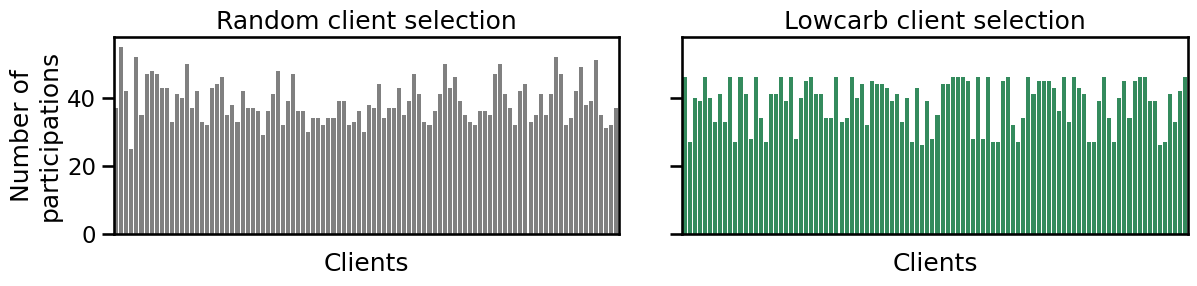

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,3), sharey=True)
fig.tight_layout()
sns.barplot(x=list(rnd_selections.keys()), y=list(rnd_selections.values()), color="grey", ax=ax1)
sns.barplot(x=list(lowcarb_selections.keys()), y=list(lowcarb_selections.values()), color="#25995c", ax=ax2)
ax1.set_title("Random client selection")
ax1.set_ylabel("Number of\nparticipations")
ax1.set_xlabel("Clients")
ax1.set_xticks([])
ax2.set_title("Lowcarb client selection")
ax2.set_xlabel("Clients")
ax2.set_xticks([])
fig.savefig("selection.png", bbox_inches='tight')

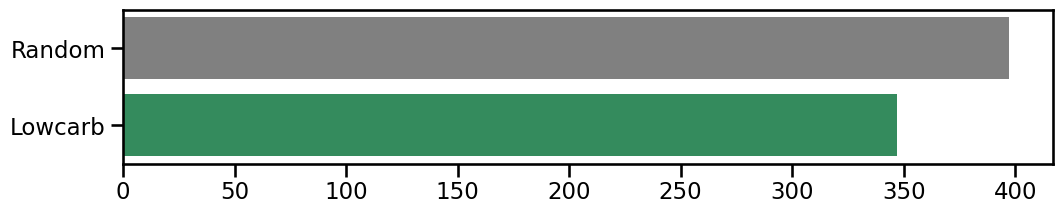

In [43]:
fig, ax = plt.subplots(figsize=(12,2))
lbs_kg_factor = 0.453592
n_locations = len(rnd_emissions)
rnd_avg_ci = sum(rnd_emissions.values()) / rnd_rounds / n_locations
lowcarb_avg_ci = sum(lowcarb_emissions.values()) / lowcarb_rounds / n_locations
sns.barplot(x=[rnd_avg_ci, lowcarb_avg_ci], y=["Random", "Lowcarb"], palette=["grey", "#25995c"], ax=ax)
fig.savefig("emissions.png", bbox_inches='tight')